# House Price Prediction

## Introduction

#### Dataset Statistics
* Number of House Data Enteries: 21613
* Highest Price of a Property:   7.7 Lacs
* Most Ancient Property:         1900
* Maximum Square Footage Area :  16,51,359 Sq Ft
* Maximum Bedroom's in a House:  33

### Data Fields Explanation
The House Price Prediction Dataset consists of 21,613 House Data Enteries. This Dataset consists of a Single CSV file, Data.csv. The columns in the table are:
* Id            : Unique row number
* Date          : The Date Price was Last Checked
* Price         : The Price of the Property
* Bedrooms      : Number of Bedrooms
* Bathrooms     : Number of Bathrooms
* Sqft_living   : Square Footage of Living Room
* Sqft_lot      : Square Footage of Lot.
* Floors        : Number of Floors
* Waterfront    : If the House has a Waterfront
* View          : If the House has a View
* Condition     : Condition of the House 1 Being the Best
* Grade         : Grade Assigned
* Sqft_above    : Square Footage of Above
* Sqft_basement : Square Footage of Basement
* Yr_built      : Year The House was built
* Yr_renovated  : Year The House was built
* Zipcode       : Zipcode 
* Lat           : Latitude
* Long          : Longitude

### Objectives

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'data/kc_house_data.csv')

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21613, 21)

* We have data of 21613 houses

### Removing Outliers 

In [6]:
from scipy import stats
df1 = df.drop('date', 1)
z = np.abs(stats.zscore(df1))
df1 = df1[(z < 3).all(axis=1)]

In [7]:
df1.dropna()
df1.shape

(18702, 20)

# Univariate Analysis 

In [9]:
df1['floorInt'] = df1['floors'].astype(int)
df1['floorInt'].head()

0    1
2    1
3    1
4    1
6    2
Name: floorInt, dtype: int32

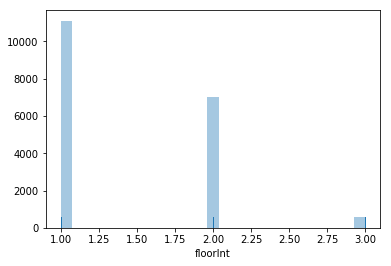

In [24]:
sns.distplot(df1['floorInt'], kde=False, rug=True)

* Houses with 1 floor are more then houses with 3 floors

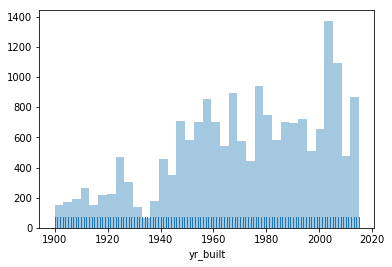

In [12]:
sns.distplot(df1['yr_built'], kde=False, rug=True)

* Max number of houses are built between 2000-2020

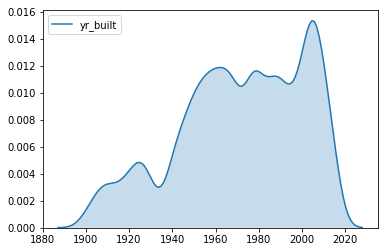

In [14]:
sns.kdeplot(df1['yr_built'], shade=True)

## Bivariate Analysis

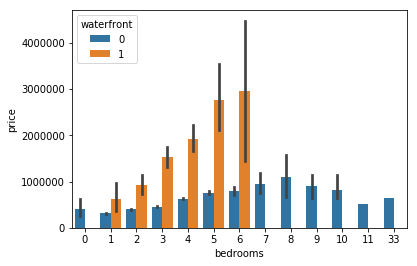

In [17]:
sns.barplot(x='bedrooms',y='price',hue='waterfront', data =df)

* Waterfront houses have maximum 6 rooms

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
df['yr_reno']=(df['yr_renovated']>0).astype(int)

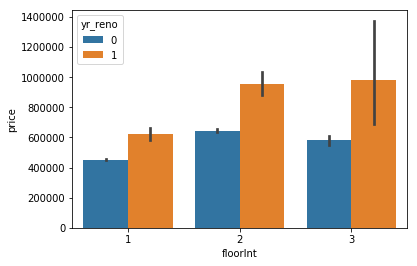

In [31]:
df['floorInt'] = df['floors'].astype(int)
sns.barplot(x='floorInt',y='price',hue='yr_reno', data =df)

* Renovated houses have much more price than non-renovated houses

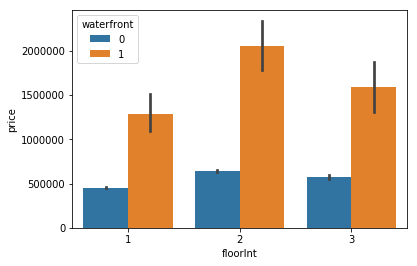

In [32]:
sns.barplot(x='floorInt',y='price',hue='waterfront', data =df)

* Seems like Houses with 3 floors and waterfront area have less price then houses with 2 floors   

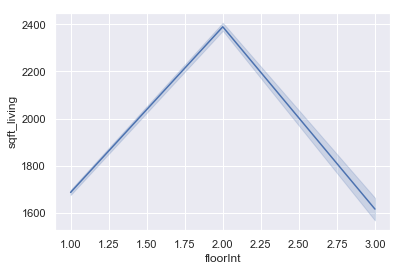

In [37]:
sns.set(style="darkgrid")
sns.lineplot(x='floorInt',y='sqft_living',data=df1)

* Houses with 2 floors have more sqft area then houses with 3 floors

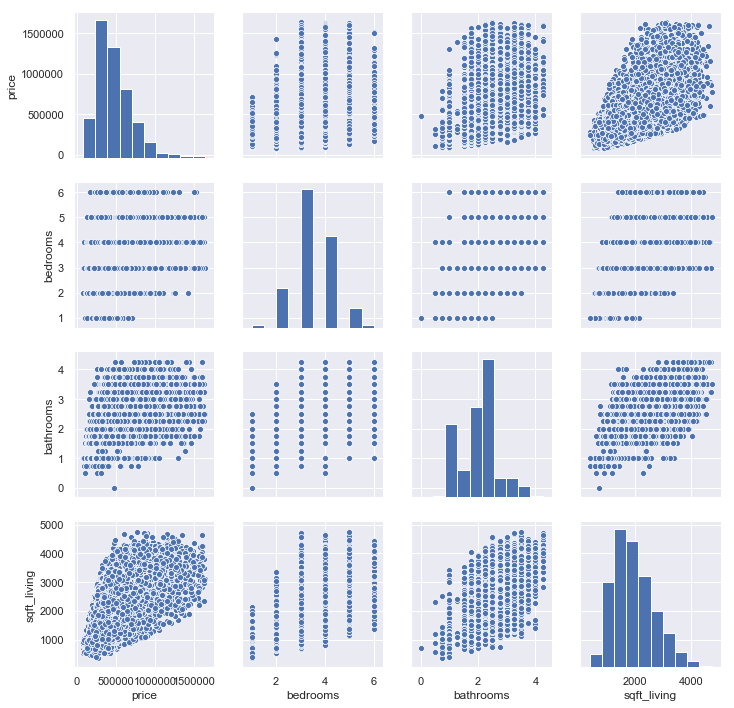

In [38]:
data = df1[['price','bedrooms','bathrooms', 'sqft_living']]
sns.pairplot(data)

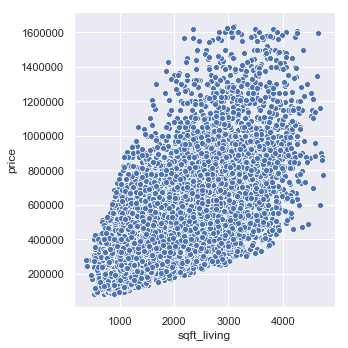

In [41]:
sns.relplot(x = 'sqft_living', y = 'price' , data=df1,legend="full")

* Majority of the people live in around 300 sqft - 6000 sqft of houses

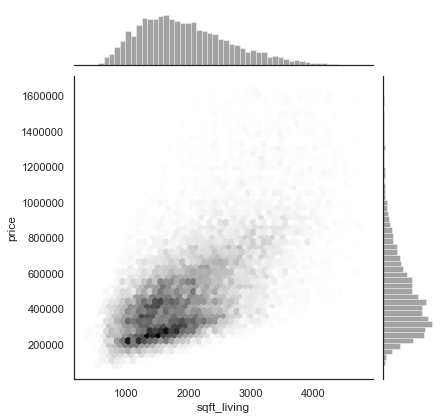

In [44]:
with sns.axes_style('white'):
    sns.jointplot(x = df1['sqft_living'] , y = df1['price'],kind = 'hex', color = 'k')
    
    

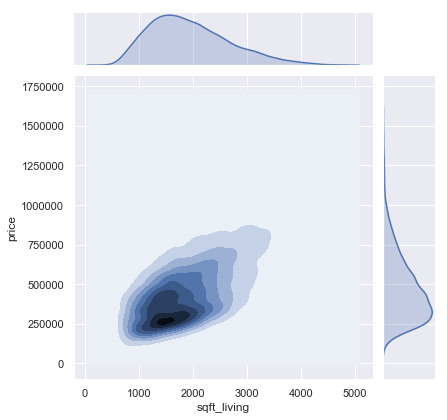

In [46]:
sns.jointplot(x = 'sqft_living', y = 'price', data = df1, kind='kde')

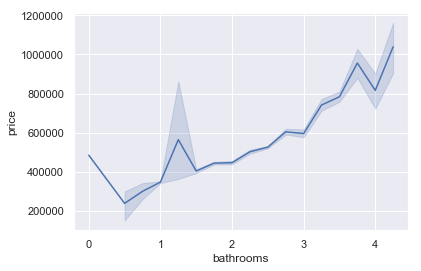

In [49]:
sns.set(style="darkgrid")
sns.lineplot(x='bathrooms',y='price',data=df1)

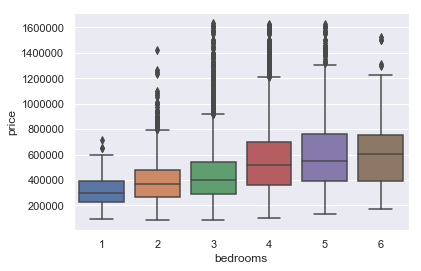

In [50]:
sns.boxplot(x = 'bedrooms', y = 'price', data= df1)

* Houses with 5 rooms and 6 rooms have almost same price

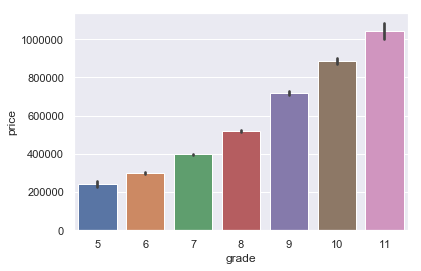

In [51]:
sns.barplot(x='grade',y='price', data =df1)

* More the grade of house more the price

## Coorelation and Head Map

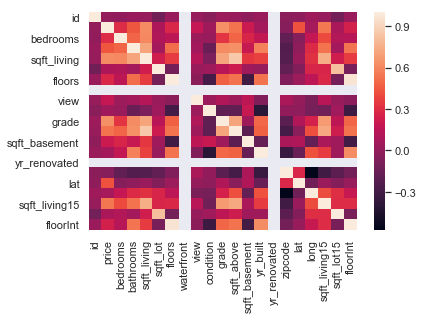

In [54]:
cor_mat = df1.corr()

sns.heatmap(cor_mat)

## Conclusion
* Houses with 1 floor are more then houses with 3 floors
* Max number of houses are built between 2000-2020
* Majority of the people live in around 300 sqft - 6000 sqft of houses
* Houses with 2 floors have more sqft area then houses with 3 floors
* More the grade of house more the price